In [1]:
import os
import sys
sys.path.append('../')
from PIL import Image
import numpy as np
import pandas as pd

from wmdetection.utils import list_images

### Add clean images to dataset

In [6]:
clean_datasets_list = [
    'clean_images/',
    # add your folders
]

clean_datasets = {i: list_images(i) for i in clean_datasets_list}

In [7]:
for k,v in clean_datasets.items():
    print(k, len(v))

clean_images/ 4


watermarked images

In [8]:
wm_datasets_list = [
    'synthetic_wm/',
    # add your folders
]

wm_datasets = {i: list_images(i) for i in wm_datasets_list}

In [9]:
for k,v in wm_datasets.items():
    print(k, len(v))

synthetic_wm/ 5


### Gather image paths to csv

In [13]:
clean_data_to_sample = [
    ('clean_images/', 4),
]

wm_data_to_sample = [
    ('synthetic_wm/', 5),
]

wm_total = 0
for t in wm_data_to_sample:
    if t[1] == 'all':
        wm_total += len(wm_datasets[t[0]])
    else:
        wm_total += t[1]
print('wm total:', wm_total)

clean_total = 0
for t in clean_data_to_sample:
    if t[1] == 'all':
        clean_total += len(clean_datasets[t[0]])
    else:
        clean_total += t[1]
print('clean total:', clean_total)
print('difference:', wm_total-clean_total)

wm total: 5
clean total: 4
difference: 1


In [14]:
import random

def sample_to_csv(data, dataset2files, label):
    res = []
    for dataset, count in data:
        if count == 'all':
            files = dataset2files[dataset]
        else:
            files = random.sample(dataset2files[dataset], k=count)
        for f in files:
            res.append({
                'path': os.path.abspath(f),
                'label': label
            })
    return pd.DataFrame(res)

df1 = sample_to_csv(wm_data_to_sample, wm_datasets, 1)
df2 = sample_to_csv(clean_data_to_sample, clean_datasets, 0)

In [16]:
res = pd.concat([df1, df2], ignore_index=True)
#res

### Train Val split

In [18]:
def train_val_split(df, val_samples_per_label=150):
    dfs_val = []
    dfs_train = []
    classes = df['label'].unique()
    for label in classes:
        df_for_label = df[df['label'] == label]
        val = df_for_label.sample(n=val_samples_per_label)
        train = df_for_label[~df_for_label['path'].isin(val['path'])]
        
        dfs_val.append(val)
        dfs_train.append(train)
    return pd.concat(dfs_train, ignore_index=True), pd.concat(dfs_val, ignore_index=True)
    
train_csv, val_csv = train_val_split(res, 1)

In [19]:
print(len(val_csv)+len(train_csv))
set(train_csv['path'].values)&set(val_csv['path'].values)

9


set()

In [20]:
train_csv['label'].value_counts()

1    4
0    3
Name: label, dtype: int64

In [21]:
val_csv['label'].value_counts()

1    1
0    1
Name: label, dtype: int64

In [22]:
train_csv.to_csv('train_data_v1-1.csv', index=False)
val_csv.to_csv('val_data_v1-1.csv', index=False)

### Check samples

1


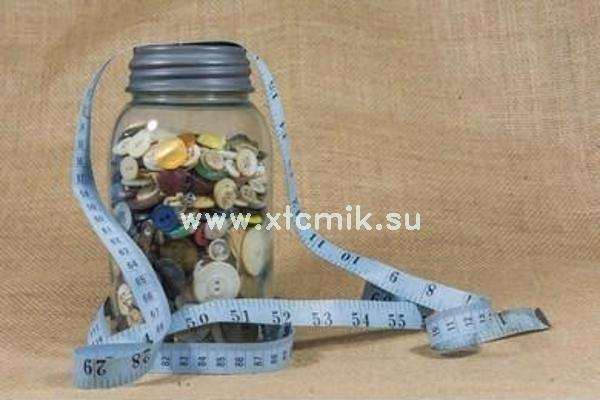

In [23]:
row = val_csv.sample(1).iloc[0]

print(row['label'])
Image.open(row['path'])